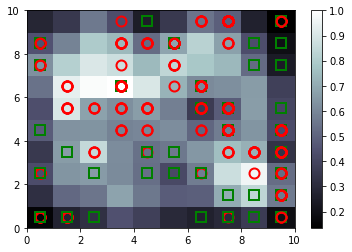

In [6]:
# Self Organizing Map

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv(r'D:\MachineLearning\NN_Templates\Self_Organizing_Maps\train.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
X = sc.fit_transform(X)

# Training the SOM
from minisom import MiniSom
som = MiniSom(x = 10, y = 10, input_len = 15, sigma = 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

# Visualizing the results
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

In [7]:
# Finding the frauds
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(3,6)], mappings[(8,2)]), axis=0)
frauds = sc.inverse_transform(frauds)

In [8]:
frauds

array([[1.5719940e+07, 0.0000000e+00, 3.5170000e+01, 3.7500000e+00,
        2.0000000e+00, 1.0000000e+00, 1.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00, 6.0000000e+00, 0.0000000e+00,
        2.0000000e+00, 0.0000000e+00, 2.0100000e+02],
       [1.5761158e+07, 0.0000000e+00, 1.6500000e+01, 1.2500000e+00,
        2.0000000e+00, 1.1000000e+01, 4.0000000e+00, 2.5000000e-01,
        0.0000000e+00, 1.0000000e+00, 1.0000000e+00, 0.0000000e+00,
        2.0000000e+00, 1.0800000e+02, 9.9000000e+01],
       [1.5711742e+07, 0.0000000e+00, 2.3000000e+01, 1.8350000e+00,
        2.0000000e+00, 5.0000000e+00, 3.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00, 1.0000000e+00, 0.0000000e+00,
        2.0000000e+00, 2.0000000e+02, 5.4000000e+01],
       [1.5761733e+07, 0.0000000e+00, 1.6080000e+01, 3.3500000e-01,
        2.0000000e+00, 1.0000000e+00, 1.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00, 1.0000000e+00, 0.0000000e+00,
        2.0000000e+00,

In [9]:
# The dependant variables
customers = dataset.iloc[:, 1:].values
is_fraud = np.zeros(len(dataset))
for i in range(len(dataset)):
    if dataset.iloc[i, 0] in frauds:
        is_fraud[i] = 1

In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
customers = sc.fit_transform(customers)

In [11]:
from keras.models import Sequential 
from keras.layers import Dense

Using TensorFlow backend.


In [12]:
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 2, kernel_initializer = 'uniform', activation = 'relu', input_dim = 15))

# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
classifier.fit(customers, is_fraud, batch_size = 1, epochs = 5)

Epoch 1/5
532/532 [==============================] - 1s 2ms/step - loss: 0.5164 - acc: 0.9774
Epoch 2/5
532/532 [==============================] - 1s 1ms/step - loss: 0.2032 - acc: 0.9774
Epoch 3/5
532/532 [==============================] - 0s 908us/step - loss: 0.1059 - acc: 0.9774
Epoch 4/5
532/532 [==============================] - 1s 951us/step - loss: 0.0790 - acc: 0.9774
Epoch 5/5
532/532 [==============================] - 0s 931us/step - loss: 0.0681 - acc: 0.9774


In [13]:
y_pred = classifier.predict(customers)
y_pred = np.concatenate((dataset.iloc[:,0:1].values, y_pred), axis = 1)
y_pred = y_pred[y_pred[:,1].argsort()]
y_pred

array([[1.55830670e+07, 1.53809728e-03],
       [1.56864610e+07, 1.65817002e-03],
       [1.57901130e+07, 1.70488306e-03],
       ...,
       [1.56679340e+07, 3.00789177e-01],
       [1.57199400e+07, 3.10338229e-01],
       [1.57363990e+07, 3.12349111e-01]])

In [14]:
# Import test data
new_dataset = pd.read_csv(r'D:\MachineLearning\NN_Templates\Self_Organizing_Maps\test.csv')
new_customers = new_dataset.iloc[:, 1:].values
new_customers = sc.fit_transform(new_customers)

In [26]:
# Use trained ANN to predict label for new test data
new_y_pred = classifier.predict(new_customers)
new_y_pred.shape

(91, 1)

In [27]:
# Use minmaxscaler for Id so that we can trace back the winner for it in SOM (In SOM, we use minmaxscaler, not standardscaler)
new_customers_id = new_dataset.iloc[:, 0:1].values
from sklearn.preprocessing import MinMaxScaler
mmsc = MinMaxScaler(feature_range = (0, 1))
new_customers_id = mmsc.fit_transform(new_customers_id)
new_customers_id

c:\users\thend\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


array([[0.18172832],
       [0.16556329],
       [0.79163078],
       [0.50856857],
       [0.91212807],
       [0.58691622],
       [0.27506378],
       [0.5772976 ],
       [0.00892952],
       [0.28448552],
       [0.11968925],
       [0.93271069],
       [0.18981288],
       [0.55829826],
       [0.12363104],
       [0.81647511],
       [0.63826611],
       [0.17345507],
       [0.74065415],
       [0.44867062],
       [0.75147048],
       [0.7755724 ],
       [0.24503482],
       [0.14589537],
       [0.93117663],
       [0.99703853],
       [0.0740326 ],
       [0.49343309],
       [0.86215638],
       [0.40276787],
       [0.22571555],
       [0.08906144],
       [0.73664263],
       [0.92085251],
       [0.20991148],
       [0.64978794],
       [0.56721958],
       [0.54404056],
       [0.42594279],
       [0.14274933],
       [0.82019541],
       [0.39457256],
       [0.01216991],
       [0.40224284],
       [0.35015053],
       [0.25953863],
       [0.18162167],
       [0.529

In [28]:
# Sort predict result in order, the higher the y, the higher chance that is it fraud
new_y_pred = np.concatenate((new_customers_id, new_y_pred), axis = 1)
new_y_pred = new_y_pred[new_y_pred[:,1].argsort()]
new_y_pred

array([[0.53281815, 0.00176842],
       [0.55829826, 0.00200386],
       [0.08906144, 0.00240617],
       [0.62814707, 0.00289848],
       [0.07982018, 0.00338971],
       [0.43145965, 0.00378689],
       [0.90769818, 0.00403805],
       [0.18162167, 0.00410995],
       [0.42594279, 0.00429187],
       [0.37521637, 0.00453105],
       [0.40224284, 0.00474697],
       [0.58394655, 0.00514863],
       [0.        , 0.00529303],
       [0.93117663, 0.00629275],
       [0.89755043, 0.00668434],
       [0.14274933, 0.0067635 ],
       [0.22571555, 0.00684977],
       [0.18172832, 0.00689093],
       [0.79163078, 0.00693634],
       [0.63826611, 0.00783335],
       [0.42232914, 0.00796181],
       [0.58484073, 0.008218  ],
       [0.89926907, 0.00836034],
       [0.91212807, 0.00841242],
       [0.85122519, 0.00877622],
       [0.82019541, 0.00905578],
       [0.99703853, 0.0091214 ],
       [0.17391447, 0.0092865 ],
       [0.4521284 , 0.0093862 ],
       [0.97961837, 0.00961422],
       [0.